No2 Задача классификации (20 баллов)

Возьмите набор данных согласно своему варианту
(https://cloud.mail.ru/public/MWZh/DQkbAHKmi). Датасет представляет собой набор
признаков, в последнем столбце указан класс объекта.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/dataset_var4_class.csv", delimiter=";",
                 names=[f"data{i}" for i in range(8)])
df.head()


,data0,data1,data2,data3,data4,data5,data6,data7
0,-0.452892,0.137497,-0.539387,-0.033506,-0.051796,-0.539387,1.309584,1
1,2.183568,-0.465947,0.100564,-0.254450,-0.177177,0.100564,-0.948185,2
2,-1.202893,-0.495887,-1.397155,-0.083091,0.027211,-1.397155,-0.387794,1
3,1.259791,0.059177,-1.695189,-0.438530,1.569401,-1.695189,-0.521768,0
4,1.266819,1.446586,0.584326,-0.060100,0.965535,0.584326,0.299563,2


data7 - целевой признак

##### 1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения.

In [3]:
df.isna().sum()


data0    5
data1    0
data2    0
data3    0
data4    0
data5    5
data6    0
data7    0
dtype: int64

Удаление строк с пропущенными значениями:

In [4]:
df = df.dropna()
df


,data0,data1,data2,data3,data4,data5,data6,data7
0,-0.452892,0.137497,-0.539387,-0.033506,-0.051796,-0.539387,1.309584,1
1,2.183568,-0.465947,0.100564,-0.254450,-0.177177,0.100564,-0.948185,2
2,-1.202893,-0.495887,-1.397155,-0.083091,0.027211,-1.397155,-0.387794,1
3,1.259791,0.059177,-1.695189,-0.438530,1.569401,-1.695189,-0.521768,0
4,1.266819,1.446586,0.584326,-0.060100,0.965535,0.584326,0.299563,2
...,...,...,...,...,...,...,...,...
95,0.685959,0.626605,0.408420,-0.017232,-1.225543,0.408420,1.455258,0
96,0.641957,0.472708,-2.070029,-0.424172,-1.304013,-2.070029,0.893591,0
97,0.346634,-1.268596,1.273054,0.168782,-0.695609,1.273054,0.472434,2
98,0.557135,0.060439,1.307023,0.148292,1.390005,1.307023,-1.141051,2


Столбцы data2 и data5 совпадают


In [5]:
all(df["data2"] == df["data5"])


True

Следовательно, стоит удалить один из них

In [6]:
df = df.drop("data2", axis=1)


##### 2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

In [7]:
df.describe()


,data0,data1,data3,data4,data5,data6,data7
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.359458,-0.059614,-0.146730,0.048286,-0.340787,0.180914,0.944444
std,1.156980,1.057892,0.450284,1.087846,1.203837,1.037785,0.839490
min,-2.648666,-2.641794,-3.169682,-2.262724,-3.025541,-1.889952,0.000000
25%,-0.360820,-0.730648,-0.265324,-0.760186,-1.268600,-0.568608,0.000000
50%,0.689052,-0.055416,-0.091452,-0.062761,-0.327281,0.164895,1.000000
75%,1.191115,0.504473,0.059973,0.796113,0.564196,0.822050,2.000000
max,2.208102,2.932663,1.205668,3.879810,2.014664,2.899234,2.000000


In [8]:
corrmat = df.corr()
corrmat


,data0,data1,data3,data4,data5,data6,data7
data0,1.000000,0.072743,-0.230051,-0.061140,0.183206,0.158738,0.019910
data1,0.072743,1.000000,-0.159238,-0.104986,-0.049417,-0.095581,-0.141620
data3,-0.230051,-0.159238,1.000000,-0.118172,0.529858,0.082860,0.357376
data4,-0.061140,-0.104986,-0.118172,1.000000,-0.132790,-0.211170,0.073955
data5,0.183206,-0.049417,0.529858,-0.132790,1.000000,0.154656,0.648031
data6,0.158738,-0.095581,0.082860,-0.211170,0.154656,1.000000,0.067408
data7,0.019910,-0.141620,0.357376,0.073955,0.648031,0.067408,1.000000


<AxesSubplot:>

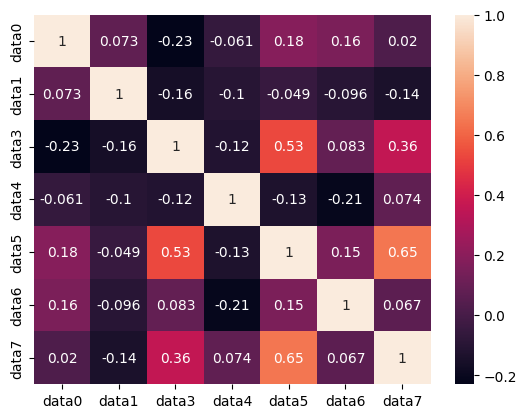

In [9]:
sns.heatmap(corrmat, annot=True)


Выбросы в данных:

<AxesSubplot:>

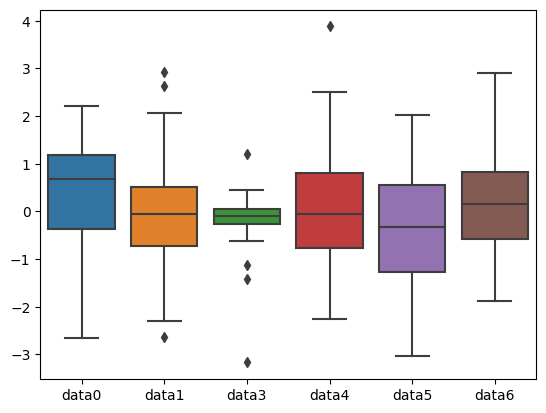

In [10]:
sns.boxplot(df.iloc[:, :-1])


Удаление выбросов:

In [11]:
df = df.loc[df["data1"] >= -2.3]
df = df.loc[df["data1"] <= 2.1]

df = df.loc[df["data3"] >= -0.9]
df = df.loc[df["data3"] <= 0.7]

df = df.loc[df["data4"] <= 3]

df


,data0,data1,data3,data4,data5,data6,data7
0,-0.452892,0.137497,-0.033506,-0.051796,-0.539387,1.309584,1
1,2.183568,-0.465947,-0.254450,-0.177177,0.100564,-0.948185,2
2,-1.202893,-0.495887,-0.083091,0.027211,-1.397155,-0.387794,1
3,1.259791,0.059177,-0.438530,1.569401,-1.695189,-0.521768,0
4,1.266819,1.446586,-0.060100,0.965535,0.584326,0.299563,2
...,...,...,...,...,...,...,...
95,0.685959,0.626605,-0.017232,-1.225543,0.408420,1.455258,0
96,0.641957,0.472708,-0.424172,-1.304013,-2.070029,0.893591,0
97,0.346634,-1.268596,0.168782,-0.695609,1.273054,0.472434,2
98,0.557135,0.060439,0.148292,1.390005,1.307023,-1.141051,2


##### 3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("data7", axis=1)
y = df["data7"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


##### 4. Для предсказания класса постройте две модели, используя библиотеку sklearn:



##### 5. Для каждой модели попытайтесь добиться наилучшего возможного результата предсказания.

a. Случайный лес RandomForestClassifier()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))
print(classification_report(rfc.predict(X_test), y_test))


0.7941176470588235
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       1.00      0.85      0.92        13
           2       0.78      0.70      0.74        10

    accuracy                           0.79        34
   macro avg       0.81      0.79      0.79        34
weighted avg       0.82      0.79      0.80        34



b. Метод ближайших соседей KNeighborsClassifier()


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=14)
knc.fit(X_train, y_train)
print(knc.score(X_test, y_test))
print(classification_report(knc.predict(X_test), y_test))


0.8235294117647058
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.91      0.91      0.91        11
           2       0.67      0.86      0.75         7

    accuracy                           0.82        34
   macro avg       0.81      0.84      0.82        34
weighted avg       0.83      0.82      0.82        34



c. Логистическая регрессия LogisticRegression()

In [25]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(max_iter=500)
lgr.fit(X_train, y_train)
print(lgr.score(X_test, y_test))
print(classification_report(lgr.predict(X_test), y_test))


0.6764705882352942
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        13
           1       0.73      0.67      0.70        12
           2       0.78      0.78      0.78         9

    accuracy                           0.68        34
   macro avg       0.69      0.69      0.69        34
weighted avg       0.68      0.68      0.68        34



##### 6. Оцените качество работы моделей. Выведите метрики модели. Напишите какая модель дала наилучший результат.

Наилучший результат дала модель KNeighborsClassifier - 0.82
